# Lab 5: Insurance Costs

https://kbodwin.github.io/GSB-544-private/Lab5.html

In [1]:
# import packages

import pandas as pd
import numpy as np
from plotnine import *
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder as ohe

## Part 1: Data Exploration

In [2]:
# import and review data - 1

data_1 = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_6/Lab 5/insurance_costs_1.csv")

In [3]:
data_1.head()

,age,sex,bmi,smoker,region,charges
0,19,female,27.900,yes,southwest,16884.92400
1,33,male,22.705,no,northwest,21984.47061
2,32,male,28.880,no,northwest,3866.85520
3,31,female,25.740,no,southeast,3756.62160
4,60,female,25.840,no,northwest,28923.13692


In [4]:
# review of the data

data_1.info()
data_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


,age,bmi,charges
count,431.000000,431.000000,431.000000
mean,37.960557,30.768898,12297.098118
std,16.363909,6.111362,11876.527128
min,18.000000,15.960000,1131.506600
25%,22.000000,26.357500,2710.444575
50%,34.000000,30.590000,9866.304850
75%,55.000000,35.272500,14510.872600
max,64.000000,49.060000,55135.402090


In [5]:
# dropping any 'na' values

d1 = data_1.dropna()

In [6]:
# getting dummies

d1_d = pd.get_dummies(d1)
d1.info()
# further use dummy variables for: four regions, sex_female, smoker_yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      431 non-null    int64  
 1   sex      431 non-null    object 
 2   bmi      431 non-null    float64
 3   smoker   431 non-null    object 
 4   region   431 non-null    object 
 5   charges  431 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 20.3+ KB


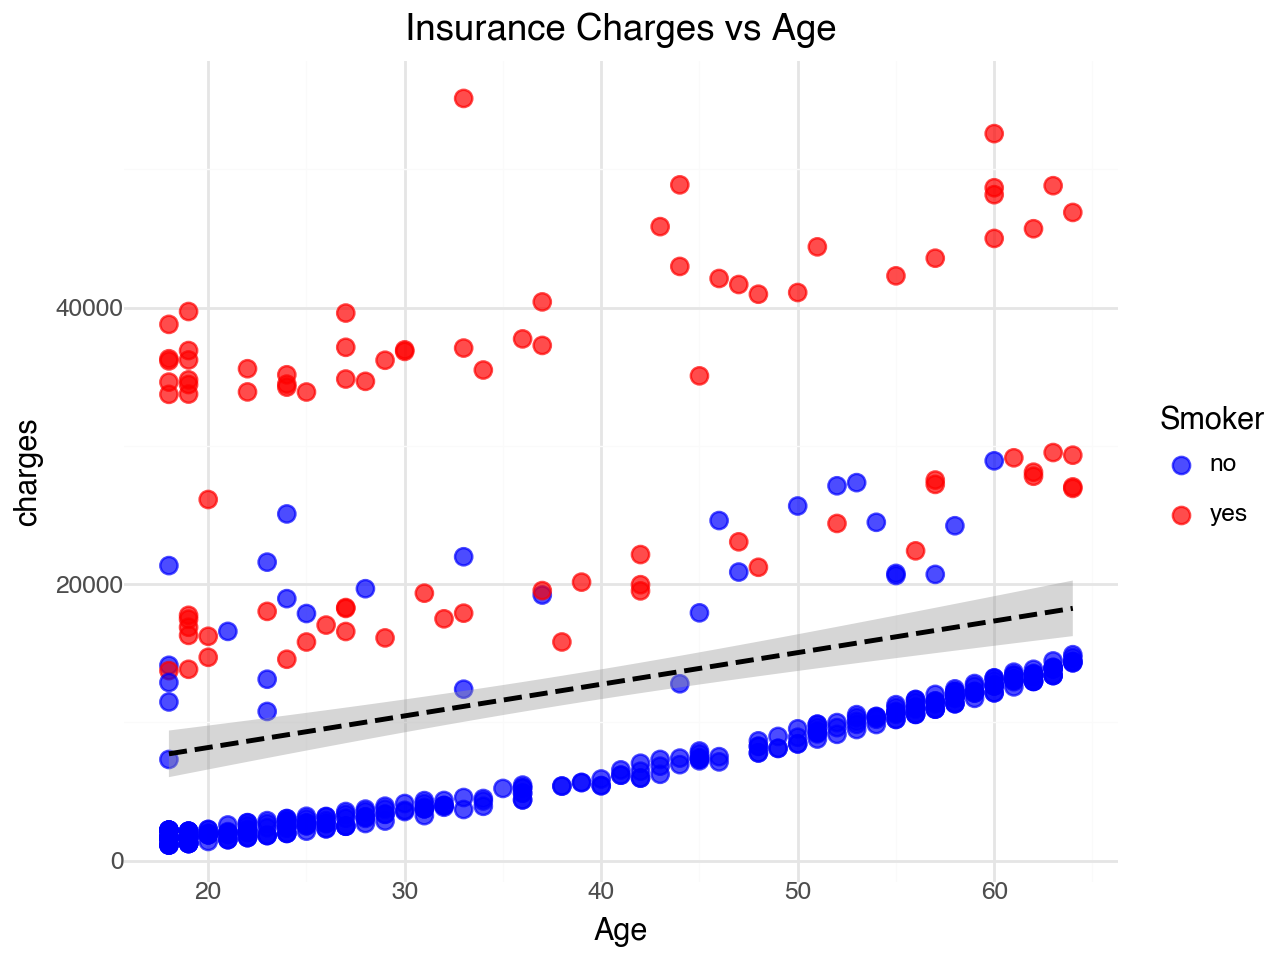

In [7]:
# plotting variables # assisted by ChatGPT

# Plot 1: Charges by Age colored as Smoker/non-smoker type and regression smoothing line

(ggplot(d1, aes(x='age', y='charges', color='smoker'))
+ geom_point(size=3, alpha=0.7)
+ geom_smooth(method='lm', color='black', linetype='dashed')
+ labs(title='Insurance Charges vs Age', x='Age', y='charges')
+ theme_minimal()
+ scale_color_manual(values={'yes': 'red', 'no': 'blue'}, name='Smoker')
)

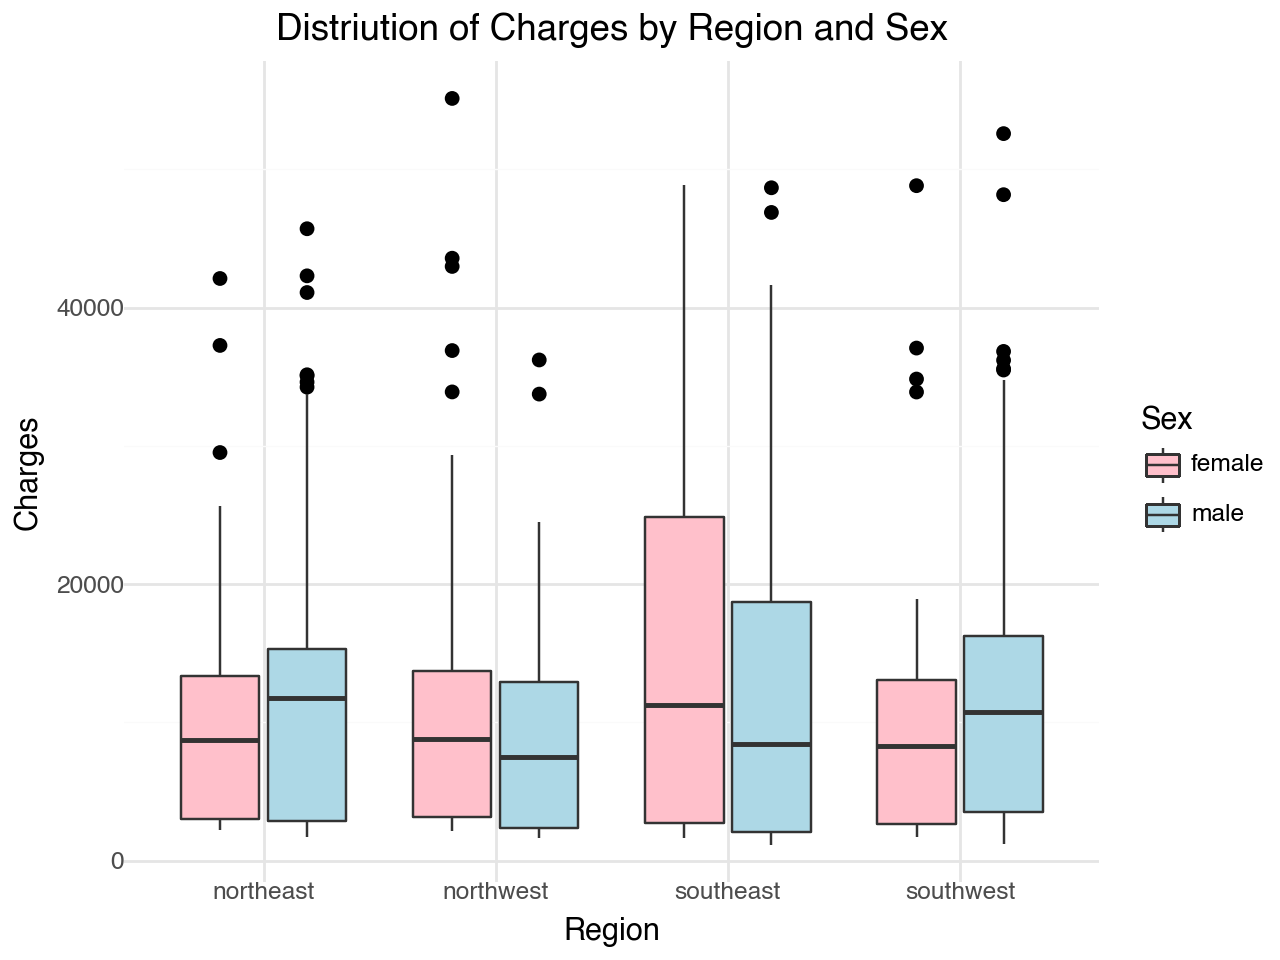

In [7]:
# Plot 2: Charges by Region and Sex

(ggplot(d1, aes(x='region', y='charges', fill='sex'))
+ geom_boxplot(outlier_shape='o', outlier_size=2, outlier_color='black') # boxplot with marked outliers
+ labs(title='Distriution of Charges by Region and Sex', x ='Region', y='Charges')
+ theme_minimal()
+ scale_fill_manual(values={'male': 'lightblue', 'female': 'pink'}, name='Sex')
)

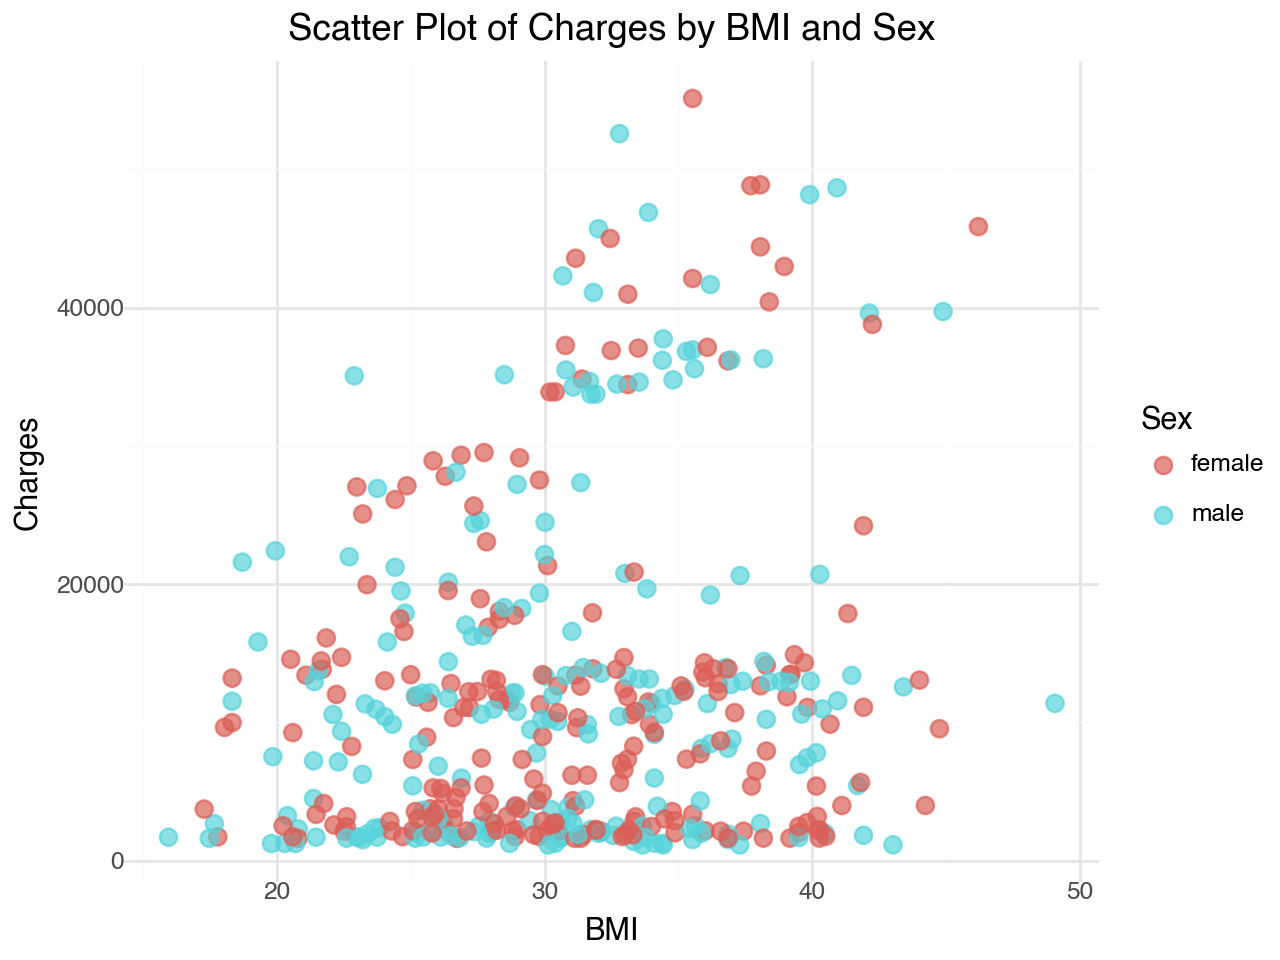

In [8]:
# Plot 3: Charges by BMI

(ggplot(d1, aes(x='bmi', y='charges', color='sex'))
+ geom_point(size=3, alpha=0.7)
+ labs(title='Scatter Plot of Charges by BMI and Sex', x='BMI', y='Charges', color='Sex')
+ theme_minimal()
)

## Part 2: Simple Linear Models

In [9]:
# checking data
d1_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               431 non-null    int64  
 1   bmi               431 non-null    float64
 2   charges           431 non-null    float64
 3   sex_female        431 non-null    bool   
 4   sex_male          431 non-null    bool   
 5   smoker_no         431 non-null    bool   
 6   smoker_yes        431 non-null    bool   
 7   region_northeast  431 non-null    bool   
 8   region_northwest  431 non-null    bool   
 9   region_southeast  431 non-null    bool   
 10  region_southwest  431 non-null    bool   
dtypes: bool(8), float64(2), int64(1)
memory usage: 13.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               43

### P2 - Model 1: 'age'

In [10]:
# Model 2.1: 'age'

# define variables
X_ = d1_d[['age']]
y_ = d1_d['charges']

In [11]:
# specify model

lr = LinearRegression()

In [12]:
# fit the model

m2_1_fit = lr.fit(X_, y_)

In [13]:
# model coefficient

m2_1_fit.coef_

array([228.79904937])

In [14]:
# estimate predicted value from the model

m2_1_pred = m2_1_fit.predict(X_)

In [15]:
# r-squared & MSE scores

r2_m2_1_fit = r2_score(y_, m2_1_pred)
mse_m2_1_fit = mean_squared_error(y_, m2_1_pred)

print(f'R-sqaured Model 1: {r2_m2_1_fit}')
print(f'MSE Model 1: {mse_m2_1_fit}')

R-sqaured Model 1: 0.09938105452062707
MSE Model 1: 126739267.91026388
R-sqaured Model 1: 0.09938105452062707
MSE Model 1: 126739267.91026388


Model 1 R-sqaured is low (<0.10) while the MSE is very 'suspiciously' high. 
Based on these two scores the Model 1 has a low prediction validity.



### P2 - Model 2: 'sex'

In [16]:
# Model 2.2: 'sex', using one dummified column 'sex_female'

# define variables
X_ = d1_d[['sex_female']]
y_ = d1_d['charges']

In [17]:
# specify model

lr = LinearRegression()

In [18]:
# fit the model

m2_2_fit = lr.fit(X_, y_)

In [19]:
# model coefficient

m2_2_fit.coef_

array([-790.28862184])

In [20]:
# estimate predicted value from the model

m2_2_pred = m2_2_fit.predict(X_)

In [21]:
# r-squared & MSE scores

r2_m2_2_fit = r2_score(y_, m2_2_pred)
mse_m2_2_fit = mean_squared_error(y_, m2_2_pred)

print(f'R-sqaured Model 2: {r2_m2_2_fit}')
print(f'MSE Model 2: {mse_m2_2_fit}')

R-sqaured Model 2: 0.001107379656908658
MSE Model 2: 140568794.44820437
R-sqaured Model 2: 0.001107379656908658
MSE Model 2: 140568794.44820437


In [22]:
# compare MSE m2 / m1

mse_m2_2_fit/mse_m2_1_fit -1

np.float64(0.10911792979372659)

Model 2 R-sqaured is even lower (<0.01) while the MSE is very high, MSE higher than Model 1 by ~10%. 
Based on these two scores, Model 2 has even lower prediction validity than Model 1 (so Model 1 is superior to Model 2). 

### P2 - Model 3: 'smoker'

In [23]:
# Model 2.3: 'smoker', using one dummified column 'smoker_yes'

# define variables
X_ = d1_d[['smoker_yes']]
y_ = d1_d['charges']

In [24]:
# specify model

lr = LinearRegression()

In [25]:
# fit the model

m2_3_fit = lr.fit(X_, y_)

In [26]:
# model coefficient

m2_3_fit.coef_

array([23623.90500127])

In [27]:
# estimate predicted value from the model

m2_3_pred = m2_3_fit.predict(X_)

In [28]:
# r-squared & MSE scores

r2_m2_3_fit = r2_score(y_, m2_3_pred)
mse_m2_3_fit = mean_squared_error(y_, m2_3_pred)

print(f'R-sqaured Model 3: {r2_m2_3_fit}')
print(f'MSE Model 3: {mse_m2_3_fit}')

R-sqaured Model 3: 0.6389346108568914
MSE Model 3: 50810793.30767888
R-sqaured Model 3: 0.6389346108568914
MSE Model 3: 50810793.30767888


In [29]:
# compare MSE m3 / m2

mse_m2_3_fit/mse_m2_2_fit -1

np.float64(-0.6385343311285121)

In [30]:
# compare MSE m3 / m1

mse_m2_3_fit/mse_m2_1_fit -1

np.float64(-0.5990919456497508)

Model 3 has the highest R-sqaured (>0.6) ie. the model captures ~63% of variability of the predicted (target) variable (charges), while the MSE is lowest (means lower margin of error from the model) compared to other two models and Model 2 in particular. 
Based on these two metrics, Model 3 has a siginficantly better prediction validity, hence is a better choice over Model 2 (and also Model 1).

## Part 3: Multiple Linear Models

In [31]:
# checking data
d1_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               431 non-null    int64  
 1   bmi               431 non-null    float64
 2   charges           431 non-null    float64
 3   sex_female        431 non-null    bool   
 4   sex_male          431 non-null    bool   
 5   smoker_no         431 non-null    bool   
 6   smoker_yes        431 non-null    bool   
 7   region_northeast  431 non-null    bool   
 8   region_northwest  431 non-null    bool   
 9   region_southeast  431 non-null    bool   
 10  region_southwest  431 non-null    bool   
dtypes: bool(8), float64(2), int64(1)
memory usage: 13.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               43

### P3 - Model 1: 'age', 'bmi'

In [32]:
# Model 3.1: 'age'

# define variables
X_ = d1_d[['age', 'bmi']]
y_ = d1_d['charges']

In [33]:
# specify model

lr = LinearRegression()

In [34]:
# fit the model

m3_1_fit = lr.fit(X_, y_)

In [35]:
# model coefficient

m3_1_fit.coef_

array([216.29721472, 283.20380126])

In [36]:
# estimate predicted value from the model

m3_1_pred = m3_1_fit.predict(X_)

In [37]:
# r-squared & MSE scores

r2_m3_1_fit = r2_score(y_, m3_1_pred)
mse_m3_1_fit = mean_squared_error(y_, m3_1_pred)

print(f'R-sqaured Model 3.1: {r2_m3_1_fit}')
print(f'MSE Model 3.1: {mse_m3_1_fit}')

R-sqaured Model 3.1: 0.12032144234129338
MSE Model 3.1: 123792439.58129103
R-sqaured Model 3.1: 0.12032144234129338
MSE Model 3.1: 123792439.58129103


In [38]:
r2_m3_1_fit/r2_m2_1_fit -1

0.21070804613287764

In [39]:
mse_m3_1_fit/mse_m2_1_fit -1

np.float64(-0.02325110739206182)

Model 3.1 ('age' & 'bmi') has a higher R-sqaured is low (>.12) while the MSE is slightly lower (by 2%) when compared to Model 2.1 ('age').
Based on these two scores the Model 3.1 has slightly better prediction accuracy than Model 2.1.



### P3 - Model 2: 'age', 'age^2'

In [40]:
# Model 3.2: 'age', 'age^2'

d1_d['age_2']=d1_d['age']**2

# define variables
X_ = d1_d[['age', 'age_2']]
y_ = d1_d['charges']

In [41]:
# specify model

lr = LinearRegression()

In [42]:
# fit the model

m3_2_fit = lr.fit(X_, y_)

In [43]:
# model coefficient

m3_2_fit.coef_

array([308.42816984,  -1.00150889])

In [44]:
# estimate predicted value from the model

m3_2_pred = m3_2_fit.predict(X_)

In [45]:
# r-squared & MSE scores

r2_m3_2_fit = r2_score(y_, m3_2_pred)
mse_m3_2_fit = mean_squared_error(y_, m3_2_pred)

print(f'R-sqaured Model 3.2: {r2_m3_2_fit}')
print(f'MSE Model 3.2: {mse_m3_2_fit}')

R-sqaured Model 3.2: 0.09958694669946921
MSE Model 3.2: 126710293.80956803
R-sqaured Model 3.2: 0.09958694669946921
MSE Model 3.2: 126710293.80956803


In [46]:
r2_m3_2_fit/r2_m2_1_fit -1

0.0020717447589511107

In [47]:
mse_m3_2_fit/mse_m2_1_fit -1

np.float64(-0.00022861186728928562)

Model 3.2 ('age' & 'age_2') has a slightly higher R-sqaured is low (by .2%) while the MSE is slightly lower (by 2%) when compared to Model 2.1 ('age').
Based on these two scores the Model 3.2 has a similar prediction accuracy as Model 2.1.



### P3 - Model 3: 'age', 'age^4'

In [48]:
# Model 3.3: 'age', 'age^2'

d1_d['age_3']=d1_d['age']**3
d1_d['age_4']=d1_d['age']**4

# define variables
X_ = d1_d[['age', 'age_2', 'age_3', 'age_4']]
y_ = d1_d['charges']

In [49]:
# specify model

lr = LinearRegression()

In [50]:
# fit the model

m3_3_fit = lr.fit(X_, y_)

In [51]:
# model coefficient

m3_3_fit.coef_

array([-7.94841022e+03,  3.58110163e+02, -6.47905090e+00,  4.12933982e-02])

In [52]:
# estimate predicted value from the model

m3_3_pred = m3_3_fit.predict(X_)

In [53]:
# r-squared & MSE scores

r2_m3_3_fit = r2_score(y_, m3_3_pred)
mse_m3_3_fit = mean_squared_error(y_, m3_3_pred)

print(f'R-sqaured Model 3.3: {r2_m3_3_fit}')
print(f'MSE Model 3.3: {mse_m3_3_fit}')

R-sqaured Model 3.3: 0.10782931453183897
MSE Model 3.3: 125550389.64569812
R-sqaured Model 3.3: 0.10782931453183897
MSE Model 3.3: 125550389.64569812


In [54]:
r2_m3_3_fit/r2_m2_1_fit -1

0.08500875797668694

In [55]:
mse_m3_3_fit/mse_m2_1_fit -1

np.float64(-0.009380504433776138)

Model 3.3 ('age' & 'age_4') has a slightly higher R-sqaured is low (by 8%) while the MSE is similar when compared to Model 2.1 ('age').
Based on these two scores the Model 3.3 has a similar prediction validity as Model 2.1, while the R-sqaured is slightly better.



### P3 - Model 4: 'age', 'age^12'

In [56]:
# Model 3.4: 'age', 'age^12'

d1_d['age_5']=d1_d['age']**5
d1_d['age_6']=d1_d['age']**6
d1_d['age_7']=d1_d['age']**7
d1_d['age_8']=d1_d['age']**8
d1_d['age_9']=d1_d['age']**9
d1_d['age_10']=d1_d['age']**10
d1_d['age_11']=d1_d['age']**11
d1_d['age_12']=d1_d['age']**12


# define variables
X_ = d1_d[['age', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9', 'age_10', 'age_11', 'age_12']]
y_ = d1_d['charges']

In [57]:
# specify model

lr = LinearRegression()

In [58]:
# fit the model

m3_4_fit = lr.fit(X_, y_)

In [59]:
# model coefficient

m3_4_fit.coef_

array([ 1.85840848e-08, -2.51011205e-06,  1.13289468e-05,  1.71922262e-04,  1.38366669e-03, -1.28011883e-04,  5.64186745e-06, -1.31723179e-07,  1.52971257e-09, -6.91415210e-12, -1.29100587e-17,  1.41344787e-16])

In [60]:
# estimate predicted value from the model

m3_4_pred = m3_4_fit.predict(X_)

In [61]:
# r-squared & MSE scores

r2_m3_4_fit = r2_score(y_, m3_4_pred)
mse_m3_4_fit = mean_squared_error(y_, m3_4_pred)

print(f'R-sqaured Model 3.4: {r2_m3_4_fit}')
print(f'MSE Model 3.4: {mse_m3_4_fit}')

R-sqaured Model 3.4: 0.10910707562416067
MSE Model 3.4: 125370577.1887007
R-sqaured Model 3.4: 0.10910707562416067
MSE Model 3.4: 125370577.1887007


In [62]:
r2_m3_4_fit/r2_m2_1_fit -1

0.09786594789568182

In [63]:
mse_m3_4_fit/mse_m2_1_fit -1

np.float64(-0.010799263275942717)

Model 3.4 ('age' & 'age_12') has a slightly higher R-sqaured is low (by 9%) while the MSE is slightly lower (by -1%) when compared to Model 2.1 ('age').
Based on these two scores the Model 3.4 has a slightly better prediction validity than Model 2.1.



P3.5: Model 2.3 ('smoker') still has a better prediction accuracy and validity when comapred to other models tested, due to significantly higher R-squared and lower MSE.

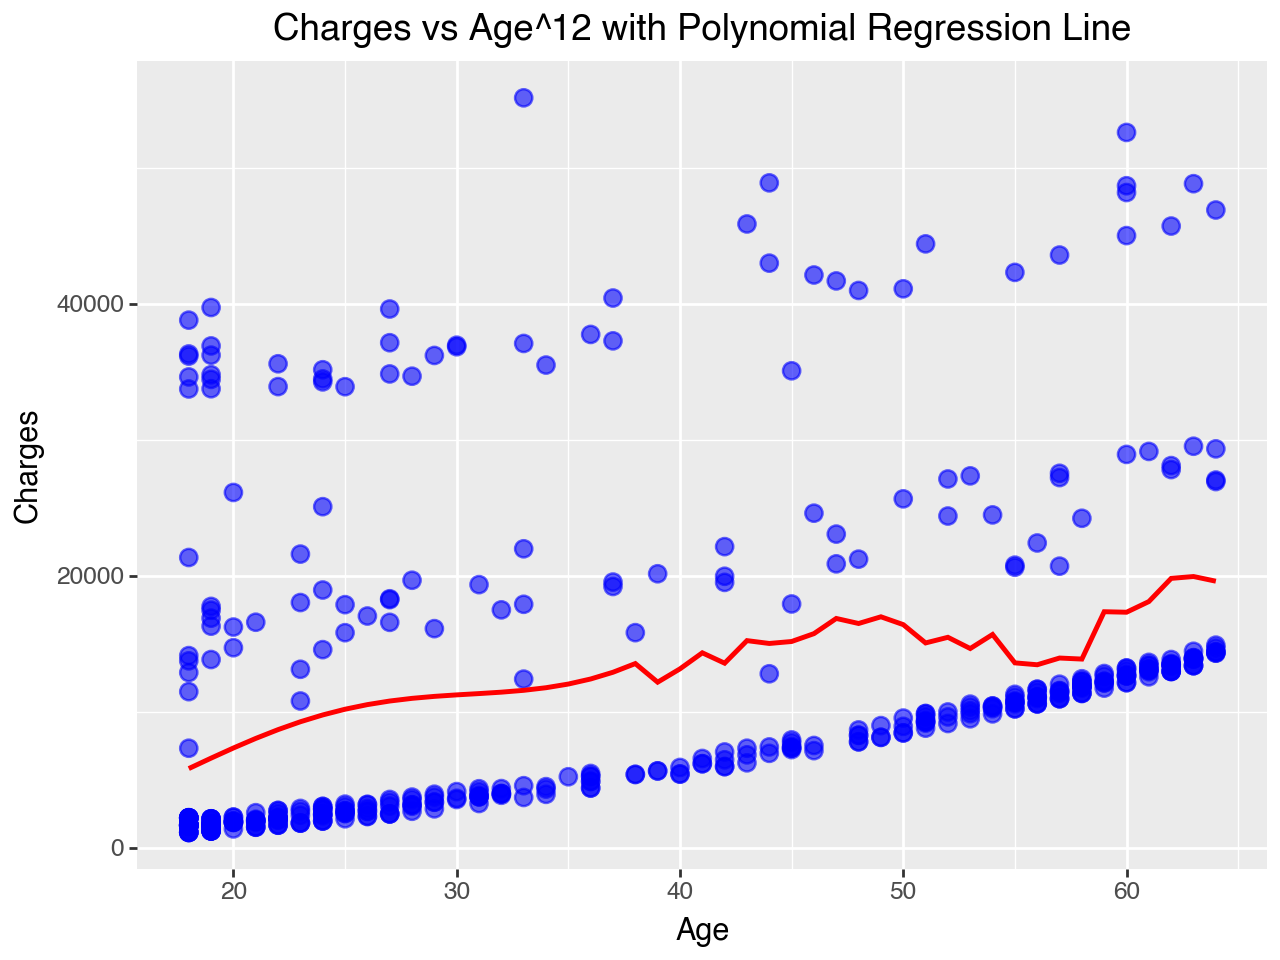

In [64]:
# P3.6: Line plot of m4_4 on Scatter plot of Charges and Age # Assisted by ChatGPT

(ggplot(d1_d, aes(x='age', y='charges'))
+ geom_point(color='blue', size=3, alpha=0.6)
+ geom_smooth(method='lm', formula='y ~ x + I(x ** 2) + I(x ** 3)+ I(x ** 4) + I(x ** 5) + I(x ** 6)+ I(x ** 7) + I(x ** 8) + I(x ** 9) + I(x ** 10)+ I(x ** 11) + I(x ** 12)', color='red', se=False)
+ labs(title='Charges vs Age^12 with Polynomial Regression Line', x='Age', y='Charges')
)


## Part 4: Model validation with New Data

### Loading and preparing new data

In [65]:
# import and review new data - 2

data_2 = pd.read_csv("/Users/andriy/Desktop/GSB544_ML/Week_6/Lab 5/insurance_costs_2.csv")

In [66]:
data_2.head()

,age,sex,bmi,smoker,region,charges
0,23,male,34.400,no,southwest,1826.84300
1,56,male,40.300,no,southwest,10602.38500
2,18,male,34.100,no,southeast,1137.01100
3,63,female,23.085,no,northeast,14451.83515
4,63,male,28.310,no,northwest,13770.09790


In [67]:
# review of the data

data_2.info()
data_2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      143 non-null    int64  
 1   sex      143 non-null    object 
 2   bmi      143 non-null    float64
 3   smoker   143 non-null    object 
 4   region   143 non-null    object 
 5   charges  143 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      143 non-null    int64  
 1   sex      143 non-null    object 
 2   bmi      143 non-null    float64
 3   smoker   143 non-null    object 
 4   region   143 non-null    object 
 5   charges  143 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 6.8+ KB


,age,bmi,charges
count,143.000000,143.000000,143.000000
mean,39.902098,29.891434,12573.571373
std,16.624822,5.786784,12495.668607
min,18.000000,18.600000,1121.873900
25%,21.500000,25.477500,3072.870450
50%,42.000000,29.300000,9634.538000
75%,56.000000,33.495000,14269.826100
max,64.000000,53.130000,63770.428010


In [68]:
# dropping any 'na' values

d2 = data_2.dropna()

In [69]:
# getting dummies

d2_d = pd.get_dummies(d2)
d2_d.info()
# further use dummy variables for: four regions, sex_female, smoker_yes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               143 non-null    int64  
 1   bmi               143 non-null    float64
 2   charges           143 non-null    float64
 3   sex_female        143 non-null    bool   
 4   sex_male          143 non-null    bool   
 5   smoker_no         143 non-null    bool   
 6   smoker_yes        143 non-null    bool   
 7   region_northeast  143 non-null    bool   
 8   region_northwest  143 non-null    bool   
 9   region_southeast  143 non-null    bool   
 10  region_southwest  143 non-null    bool   
dtypes: bool(8), float64(2), int64(1)
memory usage: 4.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               143

### Validation of New Models

### P4 - Model 1: 'age'

In [70]:
# Model 4.1: 'age'

# define variables from the train dataset
X_train = d1_d[['age']]
y_train = d1_d['charges']

In [71]:
# specify model

lr = LinearRegression()

In [72]:
# fit the model

m4_1_fit = lr.fit(X_train, y_train)

In [73]:
# model coefficient

m4_1_fit.coef_

array([228.79904937])

Coef interpretation: represents estimate of a beta for the predictor variable:
1 year increase 'age' is associated with 228.79 increase in 'charges'

In [74]:
# predict on train data
m4_1_pred = m4_1_fit.predict(X_train)

In [75]:
# estimate R-squared and MSE on train data
r2_m4_1_train = r2_score(y_train, m4_1_pred)
mse_m4_1_train = mean_squared_error(y_train, m4_1_pred)

In [76]:
# define variables from the test dataset
X_test = d2_d[['age']]
y_test = d2_d['charges']

In [77]:
# predict on test data

m4_1_test = m4_1_fit.predict(X_test)

In [78]:
# r-squared & MSE scores on test data

r2_m4_1_test = r2_score(y_test, m4_1_test)
mse_m4_1_test = mean_squared_error(y_test, m4_1_test)

In [79]:
print(f'R-sqaured Model 4.1 Train: {r2_m4_1_train}')
print(f'MSE Model 4.1 Train: {mse_m4_1_train}')

print(f'R-sqaured Model 4.1 Test: {r2_m4_1_test}')
print(f'MSE Model 4.1 Test: {mse_m4_1_test}')

R-sqaured Model 4.1 Train: 0.09938105452062707
MSE Model 4.1 Train: 126739267.91026388
R-sqaured Model 4.1 Test: 0.12236515675533055
MSE Model 4.1 Test: 136077136.50195494
R-sqaured Model 4.1 Train: 0.09938105452062707
MSE Model 4.1 Train: 126739267.91026388
R-sqaured Model 4.1 Test: 0.12236515675533055
MSE Model 4.1 Test: 136077136.50195494


In [149]:
# create df to store metrics

metrics_df = pd.DataFrame(columns=['Model', 'R-squared Train', 'R-squared Test', 'MSE Train', 'MSE Test'])
# metrics_df

In [150]:
# add row with model results to metrics_df

new_result = {
    'Model': '4.1', 
    'R-squared Train': r2_m4_1_train, 
    'R-squared Test': r2_m4_1_test,
    'MSE Train': mse_m4_1_train,
    'MSE Test': mse_m4_1_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

# metrics_df 

<positron-console-cell-150>:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.


In [151]:
metrics_df

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08


### P4 - Model 2: 'age', 'bmi'

In [83]:
# Model 4.2: 'age', 'bmi'

# define variables from the train dataset
X_train = d1_d[['age', 'bmi']]
y_train = d1_d['charges']

In [84]:
# specify model

lr = LinearRegression()

In [85]:
# fit the model

m4_2_fit = lr.fit(X_train, y_train)

In [86]:
# model coefficient

m4_2_fit.coef_

array([216.29721472, 283.20380126])

In [87]:
# predict on train data
m4_2_pred = m4_2_fit.predict(X_train)

In [88]:
# estimate R-squared and MSE on train data
r2_m4_2_train = r2_score(y_train, m4_2_pred)
mse_m4_2_train = mean_squared_error(y_train, m4_2_pred)

In [89]:
# define variables from the test dataset
X_test = d2_d[['age', 'bmi']]
y_test = d2_d['charges']

In [90]:
# predict on test data

m4_2_test = m4_2_fit.predict(X_test)

In [91]:
# r-squared & MSE scores on test data

r2_m4_2_test = r2_score(y_test, m4_2_test)
mse_m4_2_test = mean_squared_error(y_test, m4_2_test)

In [92]:
print(f'R-sqaured Model 4.2 Train: {r2_m4_2_train}')
print(f'MSE Model 4.2 Train: {mse_m4_2_train}')

print(f'R-sqaured Model 4.2 Test: {r2_m4_2_test}')
print(f'MSE Model 4.2 Test: {mse_m4_2_test}')

R-sqaured Model 4.2 Train: 0.12032144234129338
MSE Model 4.2 Train: 123792439.58129103
R-sqaured Model 4.2 Test: 0.14455628272331222
MSE Model 4.2 Test: 132636406.1108129
R-sqaured Model 4.2 Train: 0.12032144234129338
MSE Model 4.2 Train: 123792439.58129103
R-sqaured Model 4.2 Test: 0.14455628272331222
MSE Model 4.2 Test: 132636406.1108129


In [152]:
# add row with model results to metrics_df

new_result = {
    'Model': '4.2', 
    'R-squared Train': r2_m4_2_train, 
    'R-squared Test': r2_m4_2_test,
    'MSE Train': mse_m4_2_train,
    'MSE Test': mse_m4_2_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

# metrics_df 

### P4 - Model 3: 'age', 'bmi', 'smoker_yes'

In [93]:
# Model 4.3: 'age', 'bmi', 'smoker_yes'

# define variables from the train dataset
X_train = d1_d[['age', 'bmi', 'smoker_yes']]
y_train = d1_d['charges']

In [94]:
# specify model

lr = LinearRegression()

In [95]:
# fit the model

m4_3_fit = lr.fit(X_train, y_train)

In [96]:
# model coefficient

m4_3_fit.coef_

array([  240.72164671,   281.31845364, 24043.82827651])

In [97]:
# predict on train data
m4_3_pred = m4_3_fit.predict(X_train)

In [98]:
# estimate R-squared and MSE on train data
r2_m4_3_train = r2_score(y_train, m4_3_pred)
mse_m4_3_train = mean_squared_error(y_train, m4_3_pred)

In [99]:
# define variables from the test dataset
X_test = d2_d[['age', 'bmi', 'smoker_yes']]
y_test = d2_d['charges']

In [100]:
# predict on test data

m4_3_test = m4_3_fit.predict(X_test)

In [101]:
# r-squared & MSE scores on test data

r2_m4_3_test = r2_score(y_test, m4_3_test)
mse_m4_3_test = mean_squared_error(y_test, m4_3_test)

In [102]:
print(f'R-sqaured Model 4.3 Train: {r2_m4_3_train}')
print(f'MSE Model 4.3 Train: {mse_m4_3_train}')

print(f'R-sqaured Model 4.3 Test: {r2_m4_3_test}')
print(f'MSE Model 4.3 Test: {mse_m4_3_test}')

R-sqaured Model 4.3 Train: 0.7810467724680946
MSE Model 4.3 Train: 30812111.940652803
R-sqaured Model 4.3 Test: 0.7718311565047801
MSE Model 4.3 Test: 35377541.24141632
R-sqaured Model 4.3 Train: 0.7810467724680946
MSE Model 4.3 Train: 30812111.940652803
R-sqaured Model 4.3 Test: 0.7718311565047801
MSE Model 4.3 Test: 35377541.24141632


In [153]:
# add row with model results to metrics_df

new_result = {
    'Model': '4.3', 
    'R-squared Train': r2_m4_3_train, 
    'R-squared Test': r2_m4_3_test,
    'MSE Train': mse_m4_3_train,
    'MSE Test': mse_m4_3_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

# metrics_df 

### P4 - Model 4: 'age', 'bmi', 'age_smoker', 'bmi_smoker'

In [103]:
# Model 4.4: 'age', 'bmi', 'age*smoker_yes', 'bmi*smoker_yes'

# adding columns with interactions to train dataset
d1_d['age_smoker']=d1_d['age']*d1_d['smoker_yes']
d1_d['bmi_smoker']=d1_d['bmi']*d1_d['smoker_yes']

# define variables from the train dataset
X_train = d1_d[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_train = d1_d['charges']

In [104]:
# specify model

lr = LinearRegression()

In [105]:
# fit the model

m4_4_fit = lr.fit(X_train, y_train)

In [106]:
# model coefficient

m4_4_fit.coef_

array([ 270.38270813,  101.48281567, -103.12123007,  926.98257014])

In [107]:
# predict on train data
m4_4_pred = m4_4_fit.predict(X_train)

In [108]:
# estimate R-squared and MSE on train data
r2_m4_4_train = r2_score(y_train, m4_4_pred)
mse_m4_4_train = mean_squared_error(y_train, m4_4_pred)

In [109]:
# define variables from the test dataset

# adding columns with interactions to test data
d2_d['age_smoker']=d2_d['age']*d2_d['smoker_yes']
d2_d['bmi_smoker']=d2_d['bmi']*d2_d['smoker_yes']

# define variables from the train dataset
X_test = d2_d[['age', 'bmi', 'age_smoker', 'bmi_smoker']]
y_test = d2_d['charges']

In [110]:
# predict on test data

m4_4_test = m4_4_fit.predict(X_test)

In [111]:
# r-squared & MSE scores on test data

r2_m4_4_test = r2_score(y_test, m4_4_test)
mse_m4_4_test = mean_squared_error(y_test, m4_4_test)

In [112]:
print(f'R-sqaured Model 4.4 Train: {r2_m4_4_train}')
print(f'MSE Model 4.4 Train: {mse_m4_4_train}')

print(f'R-sqaured Model 4.4 Test: {r2_m4_4_test}')
print(f'MSE Model 4.4 Test: {mse_m4_4_test}')

R-sqaured Model 4.4 Train: 0.8523793681002491
MSE Model 4.4 Train: 20773858.810472343
R-sqaured Model 4.4 Test: 0.8400778135676983
MSE Model 4.4 Test: 24795908.412643325
R-sqaured Model 4.4 Train: 0.8523793681002491
MSE Model 4.4 Train: 20773858.810472343
R-sqaured Model 4.4 Test: 0.8400778135676983
MSE Model 4.4 Test: 24795908.412643325


In [154]:
# add row with model results to metrics_df

new_result = {
    'Model': '4.4', 
    'R-squared Train': r2_m4_4_train, 
    'R-squared Test': r2_m4_4_test,
    'MSE Train': mse_m4_4_train,
    'MSE Test': mse_m4_4_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

# metrics_df 

### P4 - Model 5: 'age', 'bmi', 'smoker', 'age_smoker', 'bmi_smoker'

In [113]:
# Model 4.5: 'age', 'bmi', 'smoker_yes', 'age*smoker_yes', 'bmi*smoker_yes'

# define variables from the train dataset
X_train = d1_d[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_train = d1_d['charges']

In [114]:
# specify model

lr = LinearRegression()

In [115]:
# fit the model

m4_5_fit = lr.fit(X_train, y_train)

In [116]:
# model coefficient

m4_5_fit.coef_

array([ 2.58179772e+02,  5.36117114e+00, -2.09937051e+04, -1.24532947e+01,  1.48116585e+03])

In [117]:
# predict on train data
m4_5_pred = m4_5_fit.predict(X_train)

In [118]:
# estimate R-squared and MSE on train data
r2_m4_5_train = r2_score(y_train, m4_5_pred)
mse_m4_5_train = mean_squared_error(y_train, m4_5_pred)

In [119]:
# define variables from the test dataset

# define variables from the train dataset
X_test = d2_d[['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']]
y_test = d2_d['charges']

In [120]:
# predict on test data

m4_5_test = m4_5_fit.predict(X_test)

In [121]:
# r-squared & MSE scores on test data

r2_m4_5_test = r2_score(y_test, m4_5_test)
mse_m4_5_test = mean_squared_error(y_test, m4_5_test)

In [122]:
print(f'R-sqaured Model 4.5 Train: {r2_m4_5_train}')
print(f'MSE Model 4.5 Train: {mse_m4_5_train}')

print(f'R-sqaured Model 4.5 Test: {r2_m4_5_test}')
print(f'MSE Model 4.5 Test: {mse_m4_5_test}')

R-sqaured Model 4.5 Train: 0.8672991020173331
MSE Model 4.5 Train: 18674284.77468444
R-sqaured Model 4.5 Test: 0.8594886795699616
MSE Model 4.5 Test: 21786256.866852585
R-sqaured Model 4.5 Train: 0.8672991020173331
MSE Model 4.5 Train: 18674284.77468444
R-sqaured Model 4.5 Test: 0.8594886795699616
MSE Model 4.5 Test: 21786256.866852585


In [155]:
# add row with model results to metrics_df

new_result = {
    'Model': '4.5', 
    'R-squared Train': r2_m4_5_train, 
    'R-squared Test': r2_m4_5_test,
    'MSE Train': mse_m4_5_train,
    'MSE Test': mse_m4_5_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

In [156]:
metrics_df

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07


### Answer: 
 Based on the R-squared score, Model 4.5 (['age', 'bmi', 'smoker_yes', 'age_smoker', 'bmi_smoker']) is the best performing on the Test and Train data. Model 4.5 also has the lowest MSE values among all models tested.

### Plot of residuals

In [161]:
# check length of both series
# print(len(d2_d['charges']), len(pd_pred_m4_5))

143 143
143 143


In [164]:
# adding df actual and predicted values of M4.5 for residuals estimated and plotting

act_n_preds = pd.DataFrame({
    'actual': d2_d['charges'].reset_index(drop=True),
    'M4.5 prediction': pd.Series(m4_5_test).reset_index(drop=True)
})

In [167]:
act_n_preds.head()

,actual,M4.5 prediction,residuals
0,1826.84300,3597.873351,-1771.030351
1,10602.38500,12149.436734,-1547.051734
2,1137.01100,2305.366140,-1168.355140
3,14451.83515,13864.402577,587.432573
4,13770.09790,13892.414696,-122.316796


In [166]:
act_n_preds['residuals'] = act_n_preds['actual'] - act_n_preds['M4.5 prediction']

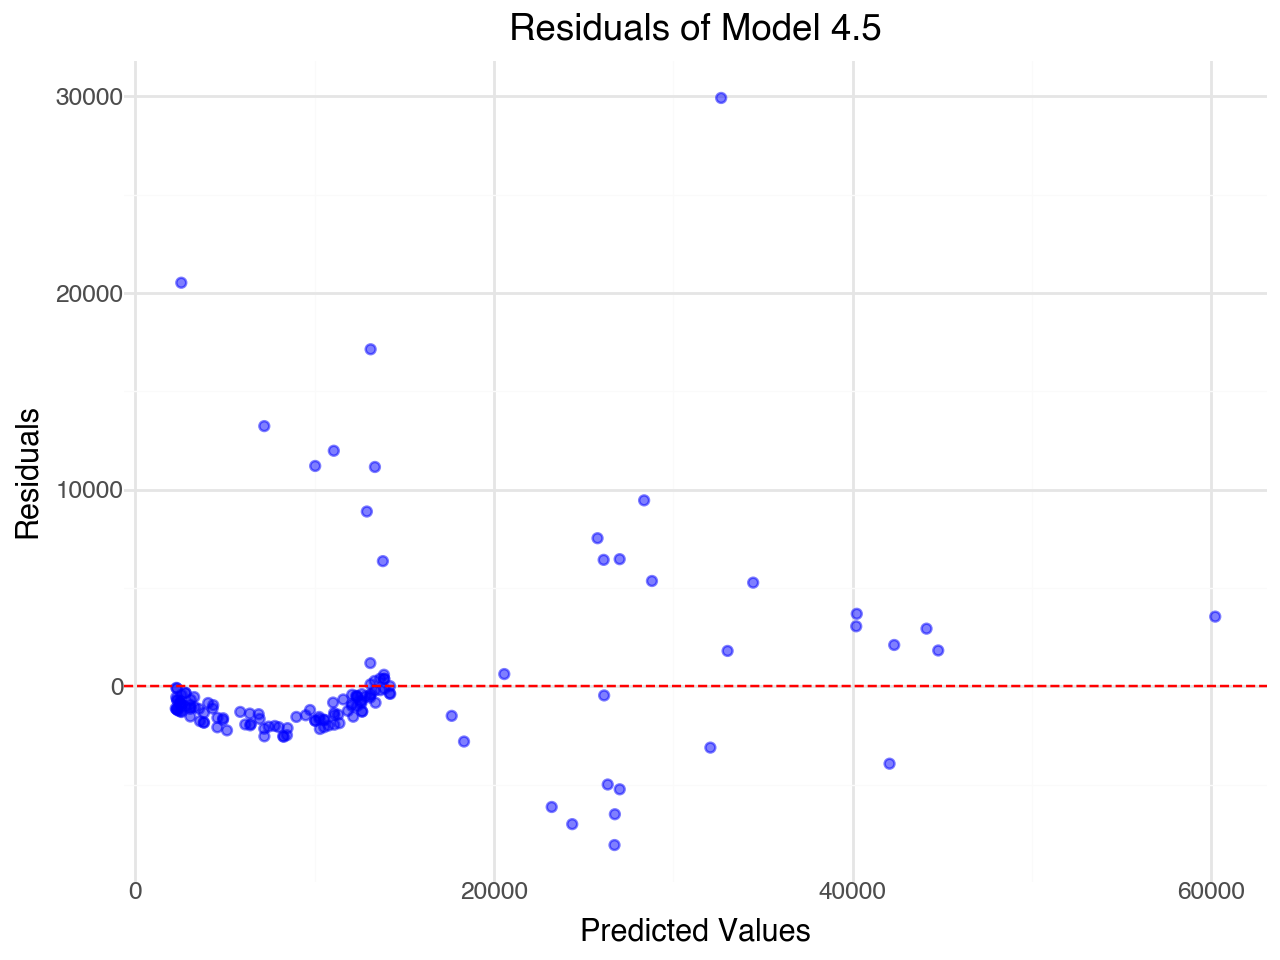

In [169]:
# Plot of residual values for Model 4.5 # note: Assissted by ChatGPT

(ggplot(act_n_preds, aes(x='M4.5 prediction', y='residuals'))
+ geom_point(color='blue', alpha=0.5)
+ geom_hline(yintercept=0, linetype='dashed', color='red')
+ labs(title='Residuals of Model 4.5', x='Predicted Values', y='Residuals')
+ theme_minimal()
)

## Part 5: Exploring other models

In [214]:
d1_d.head()

,age,bmi,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age_2,age_3,age_4,age_5,age_6,age_7,age_8,age_9,age_10,age_11,age_12,age_smoker,bmi_smoker,bmi_female,bmi_2,bmi_2_smoker
0,19,27.900,16884.92400,True,False,False,True,False,False,False,True,361,6859,130321,2476099,47045881,893871739,16983563041,322687697779,6131066257801,116490258898219,2213314919066161,19,27.9,27.90,778.410000,778.41
1,33,22.705,21984.47061,False,True,True,False,False,True,False,False,1089,35937,1185921,39135393,1291467969,42618442977,1406408618241,46411484401953,1531578985264449,50542106513726817,1667889514952984961,0,0.0,0.00,515.517025,0.00
2,32,28.880,3866.85520,False,True,True,False,False,True,False,False,1024,32768,1048576,33554432,1073741824,34359738368,1099511627776,35184372088832,1125899906842624,36028797018963968,1152921504606846976,0,0.0,0.00,834.054400,0.00
3,31,25.740,3756.62160,True,False,True,False,False,False,True,False,961,29791,923521,28629151,887503681,27512614111,852891037441,26439622160671,819628286980801,25408476896404831,787662783788549761,0,0.0,25.74,662.547600,0.00
4,60,25.840,28923.13692,True,False,True,False,False,True,False,False,3600,216000,12960000,777600000,46656000000,2799360000000,167961600000000,10077696000000000,604661760000000000,-613782547419103232,66535302272909312,0,0.0,25.84,667.705600,0.00


In [180]:
# Model 5.1: [age], [bmi], [sex_female], [smoker_yes]
X_train = d1_d[['age','bmi','sex_female','smoker_yes']]
y_train = d1_d['charges']

In [173]:
# specify model

lr = LinearRegression()

In [174]:
# fit the model

m5_1_fit = lr.fit(X_train, y_train)

In [175]:
# model coefficient

m5_1_fit.coef_

array([  240.91703007,   280.75343474,   266.39158779, 24061.07216503])

In [176]:
# predict on train data
m5_1_pred = m5_1_fit.predict(X_train)

In [177]:
# estimate R-squared and MSE on train data
r2_m5_1_train = r2_score(y_train, m5_1_pred)
mse_m5_1_train = mean_squared_error(y_train, m5_1_pred)

In [181]:
# define variables from the test dataset
X_test = d2_d[['age','bmi','sex_female','smoker_yes']]
y_test = d2_d['charges']

In [182]:
# predict on test data

m5_1_test = m5_1_fit.predict(X_test)

In [183]:
# r-squared & MSE scores on test data

r2_m5_1_test = r2_score(y_test, m5_1_test)
mse_m5_1_test = mean_squared_error(y_test, m5_1_test)

In [185]:
print(f'R-sqaured Model 5.1 Train: {r2_m5_1_train}')
print(f'MSE Model 5.1 Train: {mse_m5_1_train}')

print(f'R-sqaured Model 5.1 Test: {r2_m5_1_test}')
print(f'MSE Model 5.1 Test: {mse_m5_1_test}')

R-sqaured Model 5.1 Train: 0.78117212999223
MSE Model 5.1 Train: 30794471.049446035
R-sqaured Model 5.1 Test: 0.7712484621410353
MSE Model 5.1 Test: 35467887.90561788
R-sqaured Model 5.1 Train: 0.78117212999223
MSE Model 5.1 Train: 30794471.049446035
R-sqaured Model 5.1 Test: 0.7712484621410353
MSE Model 5.1 Test: 35467887.90561788


In [186]:
# add row with model results to metrics_df

new_result = {
    'Model': '5.1', 
    'R-squared Train': r2_m5_1_train, 
    'R-squared Test': r2_m5_1_test,
    'MSE Train': mse_m5_1_train,
    'MSE Test': mse_m5_1_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

# metrics_df 

In [187]:
metrics_df

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07
5,5.1,0.781172,0.771248,3.079447e+07,3.546789e+07


Model 5.1 - incremental improvement over model 4.3, but lower than 4.5.

In [189]:
# Model 5.2: ['age', 'bmi', 'sex_female', 'smoker_yes', 'bmi_smoker', 'bmi_female']

# adding columns with interactions to train dataset
d1_d['bmi_female']=d1_d['bmi']*d1_d['sex_female']

# train variables

X_train = d1_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'bmi_smoker', 'bmi_female']]
y_train = d1_d['charges']

In [190]:
# specify model

lr = LinearRegression()

In [191]:
# fit the model

m5_2_fit = lr.fit(X_train, y_train)

In [192]:
# model coefficient

m5_2_fit.coef_

array([ 2.56145022e+02,  3.71932551e+00,  3.15853021e+02, -2.14743329e+04,  1.48270030e+03,  2.81671354e+00])

In [193]:
# predict on train data
m5_2_pred = m5_2_fit.predict(X_train)

In [194]:
# estimate R-squared and MSE on train data
r2_m5_2_train = r2_score(y_train, m5_2_pred)
mse_m5_2_train = mean_squared_error(y_train, m5_2_pred)

In [195]:
# adding columns with interactions to test dataset
d2_d['bmi_female']=d1_d['bmi']*d1_d['sex_female']

# train variables

X_test = d2_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'bmi_smoker', 'bmi_female']]
y_test = d2_d['charges']

In [196]:
# predict on test data

m5_2_test = m5_2_fit.predict(X_test)

In [197]:
# r-squared & MSE scores on test data

r2_m5_2_test = r2_score(y_test, m5_2_test)
mse_m5_2_test = mean_squared_error(y_test, m5_2_test)

In [198]:
print(f'R-sqaured Model 5.2 Train: {r2_m5_2_train}')
print(f'MSE Model 5.2 Train: {mse_m5_2_train}')

print(f'R-sqaured Model 5.2 Test: {r2_m5_2_test}')
print(f'MSE Model 5.2 Test: {mse_m5_2_test}')

R-sqaured Model 5.2 Train: 0.8675412559266531
MSE Model 5.2 Train: 18640207.755382482
R-sqaured Model 5.2 Test: 0.8584464414198668
MSE Model 5.2 Test: 21947855.71870953
R-sqaured Model 5.2 Train: 0.8675412559266531
MSE Model 5.2 Train: 18640207.755382482
R-sqaured Model 5.2 Test: 0.8584464414198668
MSE Model 5.2 Test: 21947855.71870953


In [199]:
# add row with model results to metrics_df

new_result = {
    'Model': '5.2', 
    'R-squared Train': r2_m5_2_train, 
    'R-squared Test': r2_m5_2_test,
    'MSE Train': mse_m5_2_train,
    'MSE Test': mse_m5_2_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

# metrics_df 

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07
5,5.1,0.781172,0.771248,3.079447e+07,3.546789e+07
6,5.2,0.867541,0.858446,1.864021e+07,2.194786e+07


Model 5.2 has a similar performance to Model 4.5, however on test data the R-squared is slightly lower and MSE is higher.

In [208]:
# Model 5.3: ['age', 'bmi', 'bmi_2', 'sex_female', 'smoker_yes', 'bmi_2_smoker']

# adding columns with transformation and interaction to train dataset
d1_d['bmi_2']=d1_d['bmi']**2
d1_d['bmi_2_smoker']=d1_d['bmi_2']*d1_d['smoker_yes']

# train variables

X_train = d1_d[['age', 'bmi', 'bmi_2', 'sex_female', 'smoker_yes', 'bmi_2_smoker']]
y_train = d1_d['charges']

In [201]:
# specify model

lr = LinearRegression()

In [202]:
# fit the model

m5_3_fit = lr.fit(X_train, y_train)

In [203]:
# model coefficient

m5_3_fit.coef_

array([ 256.21067132,  634.21797059,  -10.0467606 ,  354.54894912, 1595.91258635,   22.94948952])

In [204]:
# predict on train data
m5_3_pred = m5_3_fit.predict(X_train)

In [205]:
# estimate R-squared and MSE on train data
r2_m5_3_train = r2_score(y_train, m5_3_pred)
mse_m5_3_train = mean_squared_error(y_train, m5_3_pred)

In [209]:
# adding columns with transformation and interaction to test dataset
d2_d['bmi_2']=d2_d['bmi']**2
d2_d['bmi_2_smoker']=d2_d['bmi_2']*d2_d['smoker_yes']

# train variables

X_test = d2_d[['age', 'bmi', 'bmi_2', 'sex_female', 'smoker_yes', 'bmi_2_smoker']]
y_test = d2_d['charges']

In [210]:
# predict on test data

m5_3_test = m5_3_fit.predict(X_test)

In [211]:
# r-squared & MSE scores on test data

r2_m5_3_test = r2_score(y_test, m5_3_test)
mse_m5_3_test = mean_squared_error(y_test, m5_3_test)

In [212]:
print(f'R-sqaured Model 5.3 Train: {r2_m5_3_train}')
print(f'MSE Model 5.3 Train: {mse_m5_3_train}')

print(f'R-sqaured Model 5.3 Test: {r2_m5_3_test}')
print(f'MSE Model 5.3 Test: {mse_m5_3_test}')

R-sqaured Model 5.3 Train: 0.8637399665661321
MSE Model 5.3 Train: 19175142.79431958
R-sqaured Model 5.3 Test: 0.8574719993689743
MSE Model 5.3 Test: 22098942.796659064
R-sqaured Model 5.3 Train: 0.8637399665661321
MSE Model 5.3 Train: 19175142.79431958
R-sqaured Model 5.3 Test: 0.8574719993689743
MSE Model 5.3 Test: 22098942.796659064


In [213]:
# add row with model results to metrics_df

new_result = {
    'Model': '5.3', 
    'R-squared Train': r2_m5_3_train, 
    'R-squared Test': r2_m5_3_test,
    'MSE Train': mse_m5_3_train,
    'MSE Test': mse_m5_3_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

metrics_df 

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07
5,5.1,0.781172,0.771248,3.079447e+07,3.546789e+07
6,5.2,0.867541,0.858446,1.864021e+07,2.194786e+07
7,5.3,0.863740,0.857472,1.917514e+07,2.209894e+07


Model 5.3 has similar scores and doesn't perform better than model 5.2.

In [215]:
# Model 5.4: ['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'region_southeast']

# train variables

X_train = d1_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'region_southeast']]
y_train = d1_d['charges']

In [216]:
# specify model

lr = LinearRegression()

In [217]:
# fit the model

m5_4_fit = lr.fit(X_train, y_train)

In [218]:
# model coefficient

m5_4_fit.coef_

array([ 2.41214260e+02,  2.93632620e+02,  2.49233277e+02,  2.43528428e+04, -6.47024606e+00, -5.61155762e+02])

In [219]:
# predict on train data
m5_4_pred = m5_4_fit.predict(X_train)

In [220]:
# estimate R-squared and MSE on train data
r2_m5_4_train = r2_score(y_train, m5_4_pred)
mse_m5_4_train = mean_squared_error(y_train, m5_4_pred)

In [221]:
# train variables

X_test = d2_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'region_southeast']]
y_test = d2_d['charges']

In [222]:
# predict on test data

m5_4_test = m5_4_fit.predict(X_test)

In [223]:
# r-squared & MSE scores on test data

r2_m5_4_test = r2_score(y_test, m5_4_test)
mse_m5_4_test = mean_squared_error(y_test, m5_4_test)

In [224]:
print(f'R-sqaured Model 5.4 Train: {r2_m5_4_train}')
print(f'MSE Model 5.4 Train: {mse_m5_4_train}')

print(f'R-sqaured Model 5.4 Test: {r2_m5_4_test}')
print(f'MSE Model 5.4 Test: {mse_m5_4_test}')

R-sqaured Model 5.4 Train: 0.7816081066091236
MSE Model 5.4 Train: 30733118.401327252
R-sqaured Model 5.4 Test: 0.7687370220230334
MSE Model 5.4 Test: 35857286.278283164
R-sqaured Model 5.4 Train: 0.7816081066091236
MSE Model 5.4 Train: 30733118.401327252
R-sqaured Model 5.4 Test: 0.7687370220230334
MSE Model 5.4 Test: 35857286.278283164


In [225]:
# add row with model results to metrics_df

new_result = {
    'Model': '5.4', 
    'R-squared Train': r2_m5_4_train, 
    'R-squared Test': r2_m5_4_test,
    'MSE Train': mse_m5_4_train,
    'MSE Test': mse_m5_4_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

metrics_df 

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07
5,5.1,0.781172,0.771248,3.079447e+07,3.546789e+07
6,5.2,0.867541,0.858446,1.864021e+07,2.194786e+07
7,5.3,0.863740,0.857472,1.917514e+07,2.209894e+07
8,5.4,0.781608,0.768737,3.073312e+07,3.585729e+07


Model 5.4 scores are lower than other prior 2 model, hence region 'Southeast' variable is not adding value to the model.

In [226]:
# Model 5.5: ['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'bmi_smoker', 'bmi_age']

# adding interaction for bmi_age
d1_d['bmi_age']=d1_d['bmi']*d1_d['age']

# define variables from the train dataset
X_train = d1_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'bmi_smoker', 'bmi_age']]
y_train = d1_d['charges']

In [227]:
# specify model

lr = LinearRegression()

In [228]:
# fit the model

m5_5_fit = lr.fit(X_train, y_train)

In [229]:
# model coefficient

m5_5_fit.coef_

array([ 2.49998057e+02, -6.60064369e+00,  4.09042694e+02, -2.10120423e+04, -1.31060395e+01,  1.48356719e+03,  2.77538845e-01])

In [230]:
# predict on train data
m5_5_pred = m5_5_fit.predict(X_train)

In [231]:
# estimate R-squared and MSE on train data
r2_m5_5_train = r2_score(y_train, m5_5_pred)
mse_m5_5_train = mean_squared_error(y_train, m5_5_pred)

In [232]:
# define variables from the test dataset

# adding interaction for bmi_age
d2_d['bmi_age']=d2_d['bmi']*d2_d['age']

# define variables from the train dataset
X_test = d2_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'bmi_smoker', 'bmi_age']]
y_test = d2_d['charges']

In [233]:
# predict on test data

m5_5_test = m5_5_fit.predict(X_test)

In [234]:
# r-squared & MSE scores on test data

r2_m5_5_test = r2_score(y_test, m5_5_test)
mse_m5_5_test = mean_squared_error(y_test, m5_5_test)

In [235]:
print(f'R-sqaured Model 5.5 Train: {r2_m5_5_train}')
print(f'MSE Model 5.5 Train: {mse_m5_5_train}')

print(f'R-sqaured Model 5.5 Test: {r2_m5_5_test}')
print(f'MSE Model 5.5 Test: {mse_m5_5_test}')

R-sqaured Model 5.5 Train: 0.8675964313925715
MSE Model 5.5 Train: 18632443.20835379
R-sqaured Model 5.5 Test: 0.8582101283291139
MSE Model 5.5 Test: 21984496.02413393
R-sqaured Model 5.5 Train: 0.8675964313925715
MSE Model 5.5 Train: 18632443.20835379
R-sqaured Model 5.5 Test: 0.8582101283291139
MSE Model 5.5 Test: 21984496.02413393


In [236]:
# add row with model results to metrics_df

new_result = {
    'Model': '5.5', 
    'R-squared Train': r2_m5_5_train, 
    'R-squared Test': r2_m5_5_test,
    'MSE Train': mse_m5_5_train,
    'MSE Test': mse_m5_5_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

In [237]:
metrics_df

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07
5,5.1,0.781172,0.771248,3.079447e+07,3.546789e+07
6,5.2,0.867541,0.858446,1.864021e+07,2.194786e+07
7,5.3,0.863740,0.857472,1.917514e+07,2.209894e+07
8,5.4,0.781608,0.768737,3.073312e+07,3.585729e+07
9,5.5,0.867596,0.858210,1.863244e+07,2.198450e+07


Model 5.5 scores are similar to best models so far 4.5 and 5.2.

In [238]:
# Model 5.6: ['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'bmi_smoker', 'bmi_female', 'bmi_age']

# train variables

X_train = d1_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'bmi_smoker', 'bmi_female', 'bmi_age']]
y_train = d1_d['charges']

In [239]:
# specify model

lr = LinearRegression()

In [240]:
# fit the model

m5_6_fit = lr.fit(X_train, y_train)

In [241]:
# model coefficient

m5_6_fit.coef_

array([ 2.50053031e+02, -9.13596765e+00,  2.58003029e+02, -2.10072775e+04, -1.32809210e+01,  1.48364662e+03,  4.91396243e+00,  2.77954382e-01])

In [242]:
# predict on train data
m5_6_pred = m5_6_fit.predict(X_train)

In [243]:
# estimate R-squared and MSE on train data
r2_m5_6_train = r2_score(y_train, m5_6_pred)
mse_m5_6_train = mean_squared_error(y_train, m5_6_pred)

In [244]:
# train variables

X_test = d2_d[['age', 'bmi', 'sex_female', 'smoker_yes', 'age_smoker', 'bmi_smoker', 'bmi_female', 'bmi_age']]
y_test = d2_d['charges']

In [245]:
# predict on test data

m5_6_test = m5_6_fit.predict(X_test)

In [246]:
# r-squared & MSE scores on test data

r2_m5_6_test = r2_score(y_test, m5_6_test)
mse_m5_6_test = mean_squared_error(y_test, m5_6_test)

In [247]:
print(f'R-sqaured Model 5.6 Train: {r2_m5_6_train}')
print(f'MSE Model 5.6 Train: {mse_m5_6_train}')

print(f'R-sqaured Model 5.6 Test: {r2_m5_6_test}')
print(f'MSE Model 5.6 Test: {mse_m5_6_test}')

R-sqaured Model 5.6 Train: 0.8675980171645581
MSE Model 5.6 Train: 18632220.05117764
R-sqaured Model 5.6 Test: 0.8581479244909138
MSE Model 5.6 Test: 21994140.718902882
R-sqaured Model 5.6 Train: 0.8675980171645581
MSE Model 5.6 Train: 18632220.05117764
R-sqaured Model 5.6 Test: 0.8581479244909138
MSE Model 5.6 Test: 21994140.718902882


In [248]:
# add row with model results to metrics_df

new_result = {
    'Model': '5.6', 
    'R-squared Train': r2_m5_6_train, 
    'R-squared Test': r2_m5_6_test,
    'MSE Train': mse_m5_6_train,
    'MSE Test': mse_m5_6_test
    }
new_result_df = pd.DataFrame([new_result])
metrics_df = pd.concat([metrics_df, new_result_df], ignore_index=True)

metrics_df 

,Model,R-squared Train,R-squared Test,MSE Train,MSE Test
0,4.1,0.099381,0.122365,1.267393e+08,1.360771e+08
1,4.2,0.120321,0.144556,1.237924e+08,1.326364e+08
2,4.3,0.781047,0.771831,3.081211e+07,3.537754e+07
3,4.4,0.852379,0.840078,2.077386e+07,2.479591e+07
4,4.5,0.867299,0.859489,1.867428e+07,2.178626e+07
5,5.1,0.781172,0.771248,3.079447e+07,3.546789e+07
6,5.2,0.867541,0.858446,1.864021e+07,2.194786e+07
7,5.3,0.863740,0.857472,1.917514e+07,2.209894e+07
8,5.4,0.781608,0.768737,3.073312e+07,3.585729e+07
9,5.5,0.867596,0.858210,1.863244e+07,2.198450e+07


Models 5.2, 5.5 and 5.6 have similar scores to Model 4.5, however none of them is significantly better when comparing R-squared or MSE scores on Test data.

### Plotting residuals of the selected model. 
Note: I would still pick Model 4.5 as it has similar or better performance to other 'close' models with more predictor variables. However, to plot something different, I pick model 5.2 as it has slightly better scores than other explored models.

In [249]:
act_n_preds_2 = pd.DataFrame({
    'actual': d2_d['charges'].reset_index(drop=True),
    'M5.2 prediction': pd.Series(m5_2_test).reset_index(drop=True)
})

In [251]:
act_n_preds_2['residuals'] = act_n_preds_2['actual'] - act_n_preds_2['M5.2 prediction']

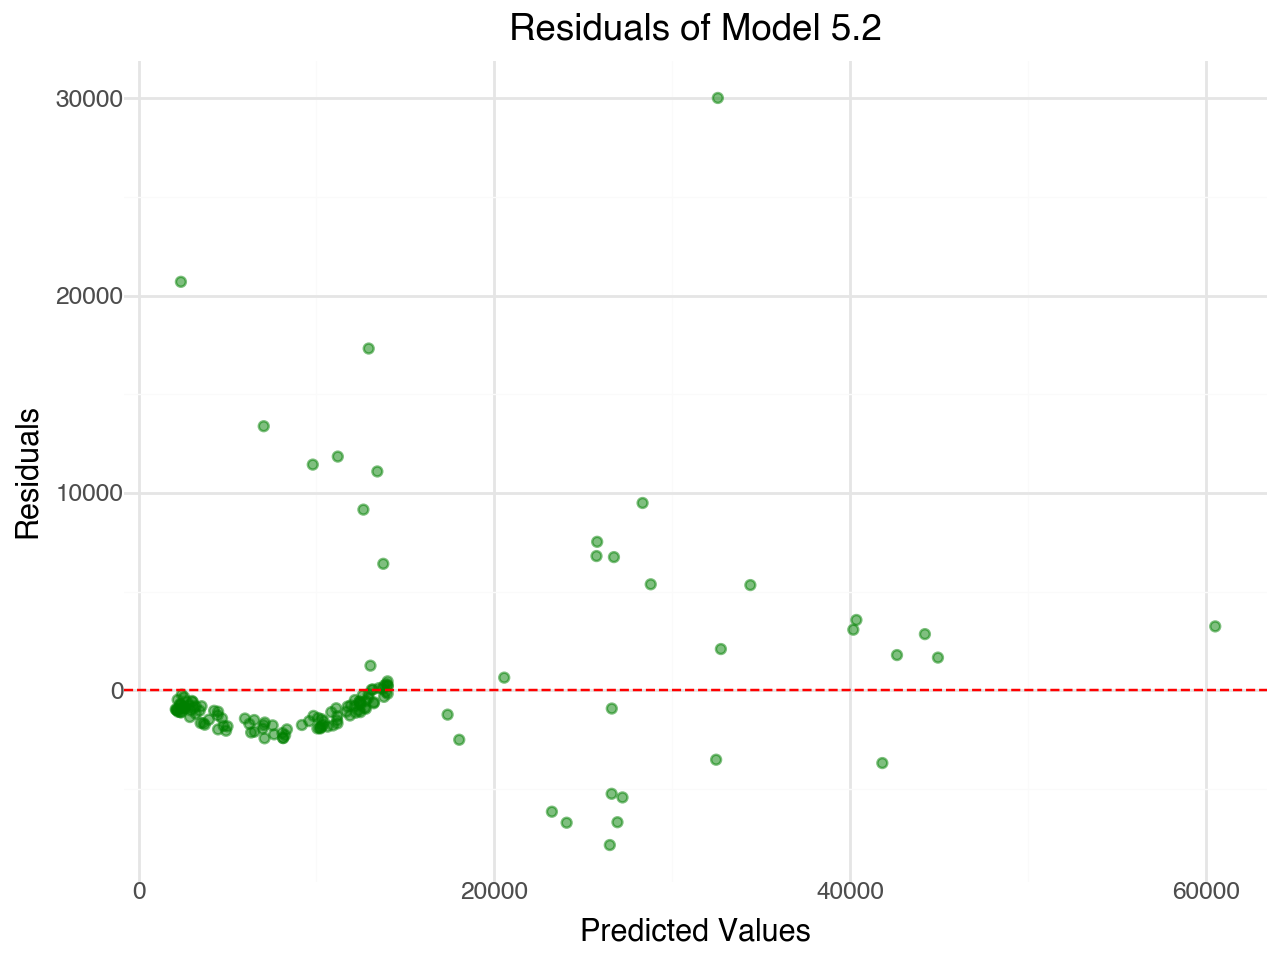

In [252]:
# Plot of residual values for Model 5.2

(ggplot(act_n_preds_2, aes(x='M5.2 prediction', y='residuals'))
+ geom_point(color='green', alpha=0.5)
+ geom_hline(yintercept=0, linetype='dashed', color='red')
+ labs(title='Residuals of Model 5.2', x='Predicted Values', y='Residuals')
+ theme_minimal()
)

The plot of residuals of Model 5.2 is similar to that of 4.5.